Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [3]:
import pandas as pd
import sqlite3

%store -r bike_station_information_df
%store -r yelp_result_df
%store -r fourSquare_result_df

bike_station_information_df = bike_station_information_df
fourSquare_result_df = fourSquare_result_df
yelp_result_df = yelp_result_df

f_merged_df = pd.merge(bike_station_information_df, fourSquare_result_df, left_index=True, right_on='Key')
y_merged_df = pd.merge(bike_station_information_df, yelp_result_df, left_index=True, right_on='Key')

# Add a 'Rating' column to merged_df with null values
f_merged_df['Rating'] = None


# Concatenate the two dataframes based using the 'Key' column
final_df = pd.concat([f_merged_df, y_merged_df], ignore_index=True)
%store final_df
final_df
#final_df.loc[final_df['Key'] ==2]


Stored 'final_df' (DataFrame)


/var/folders/zt/3v2kwmb56nn2drd812spmkkw0000gn/T/ipykernel_55803/1228467518.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([f_merged_df, y_merged_df], ignore_index=True)


,City,Latitude,Longitude,Number of Bikes,Key,Name,Category,Distance,Rating
0,Cergy,49.034625,2.067596,12,0,Ecole de biologie industrielle,Education,259.000000,NaN
1,Cergy,49.034625,2.067596,12,0,Esprit Clean,Fashion Accessories Store,283.000000,NaN
2,Cergy,49.034625,2.067596,12,0,Le Millésime du Port,French Restaurant,634.000000,NaN
3,Cergy,49.034625,2.067596,12,0,La Taverne des Rois,Restaurant,648.000000,NaN
4,Cergy,49.034625,2.067596,12,0,Au Fourmont Village,Bakery,359.000000,NaN
...,...,...,...,...,...,...,...,...,...
844,Cergy,49.047619,2.096823,9,42,La Fontaine de Trévi,French,123.062331,3.5
845,Cergy,49.047619,2.096823,9,42,Uchitomi,Japanese,298.866798,4.0
846,Cergy,49.044831,2.053462,4,43,Ici et Ailleurs,French,442.971295,4.0
847,Cergy,49.044831,2.053462,4,43,La Ciboulette,French,484.855675,4.5


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

/Users/mac/anaconda3/envs/lhl_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mac/anaconda3/envs/lhl_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mac/anaconda3/envs/lhl_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


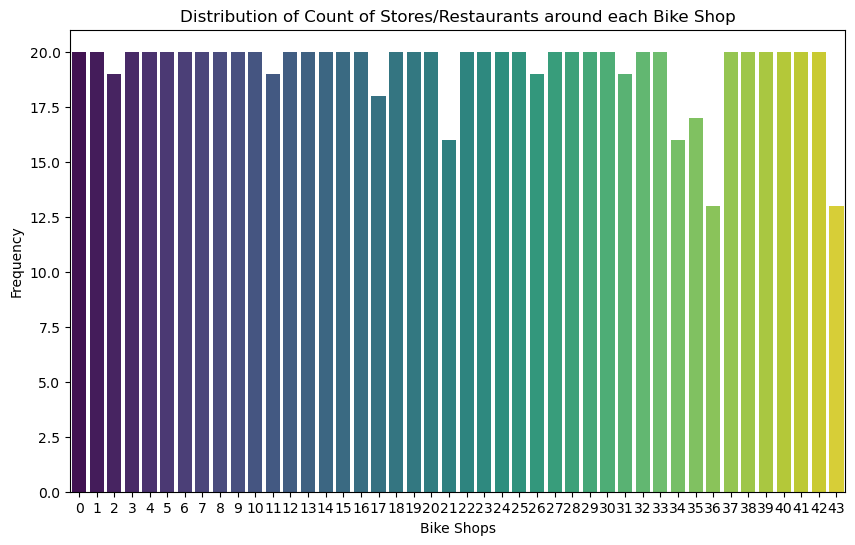

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Key' and count the occurrences
count_df = final_df.groupby('Key').size().reset_index(name='Count')

# Create a histogram plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Key', y='Count', data=count_df, palette='viridis')
plt.title('Distribution of Count of Stores/Restaurants around each Bike Shop')
plt.xlabel('Bike Shops')
plt.ylabel('Frequency')
plt.show()


/Users/mac/anaconda3/envs/lhl_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mac/anaconda3/envs/lhl_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mac/anaconda3/envs/lhl_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mac/anaconda3/envs/lhl_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

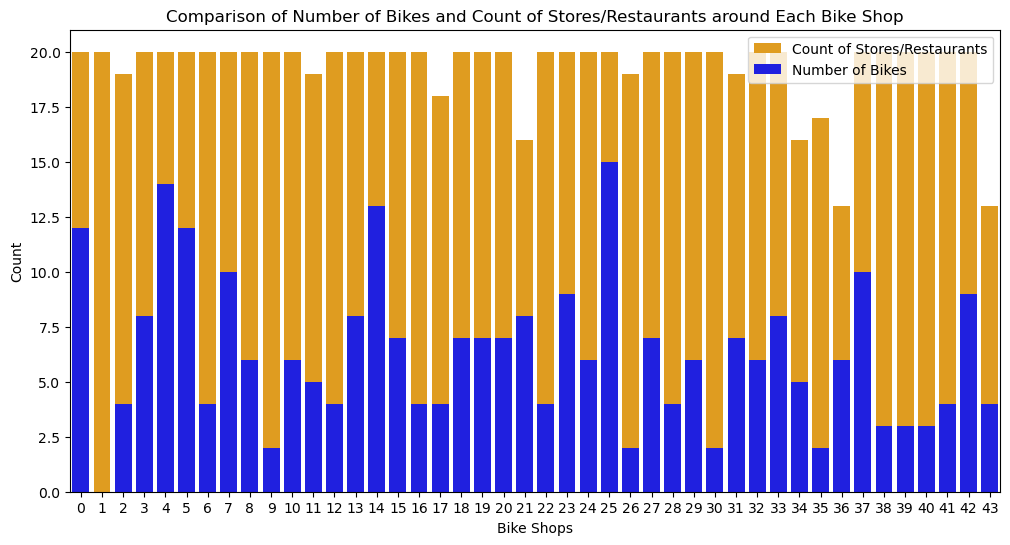

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Group by 'Key' and select the first value of 'Number of Bikes' for each group
grouped_df = final_df.groupby('Key').agg({'Number of Bikes': 'first', 'City': 'count'}).reset_index()
grouped_df.columns = ['Key', 'Number of Bikes', 'Count of Stores/Restaurants']

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Key', y='Count of Stores/Restaurants', data=grouped_df, color='orange', label='Count of Stores/Restaurants')
sns.barplot(x='Key', y='Number of Bikes', data=grouped_df, color='blue', label='Number of Bikes')

plt.title('Comparison of Number of Bikes and Count of Stores/Restaurants around Each Bike Shop')
plt.xlabel('Bike Shops')
plt.ylabel('Count')
plt.legend()
plt.show()

/Users/mac/anaconda3/envs/lhl_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


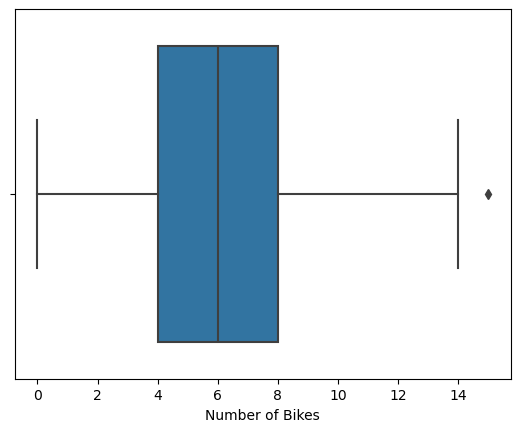

In [7]:
# Box plot for 'Number of Bikes' to check for outliers
sns.boxplot(x=grouped_df['Number of Bikes'])
plt.show()

From the two visualization I find no correlation between bike shops, available bikes and the number of stores around a bike shop. 

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [65]:
conn = sqlite3.connect('../data/citybikes.db') 
cursor = conn.cursor()

# Create bike_stations table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS bike_stations (
        City TEXT,
        Latitude REAL,
        Longitude REAL,
        Number_of_Bikes INTEGER,
        Key INTEGER,
        PRIMARY KEY (Key)
    )
''')

# Create places table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS places (
        Key INTEGER,
        Name TEXT,
        Category TEXT,
        Distance REAL,
        Rating REAL,
        FOREIGN KEY (Key) REFERENCES bike_stations(Key)
    )
''')

conn.commit()


# Insert data into bike_stations table
bike_station_information_df.to_sql('bike_stations', conn, index=True, if_exists='replace', index_label='Key')


# Insert data into places table
places_df = final_df[['Key', 'Name', 'Category', 'Distance', 'Rating']]
places_df.to_sql('places', conn, index=False, if_exists='replace')

conn.close()


Look at the data before and after the join to validate your data.

In [66]:
conn = sqlite3.connect('../data/citybikes.db') 
pd.read_sql("""SELECT *
                        FROM places
                     """, conn
                    )

,Key,Name,Category,Distance,Rating
0,0,Ecole de biologie industrielle,Education,259.000000,NaN
1,0,Esprit Clean,Fashion Accessories Store,283.000000,NaN
2,0,Le Millésime du Port,French Restaurant,634.000000,NaN
3,0,La Taverne des Rois,Restaurant,648.000000,NaN
4,0,Au Fourmont Village,Bakery,359.000000,NaN
...,...,...,...,...,...
844,42,La Fontaine de Trévi,French,123.062331,3.5
845,42,Uchitomi,Japanese,298.866798,4.0
846,43,Ici et Ailleurs,French,442.971295,4.0
847,43,La Ciboulette,French,484.855675,4.5
